# Auto Ownership 
Validation to Household Travel Survey

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import os, sys
%matplotlib inline

os.chdir('..\..\..\..')

# from input_configuration import base_year
import toml
config = toml.load(os.path.join(os.getcwd(), 'configuration/input_configuration.toml'))

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



In [2]:
working_dir = r'outputs/agg/dash'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

In [3]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

## Regional Totals and Distribution

Text(0, 0.5, 'Household Vehicles Owned')

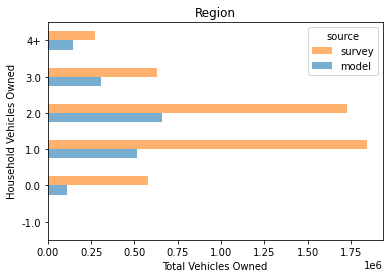

In [4]:
df = load_data('auto_ownership')
df.loc[df['hhvehs'] >= 4, 'hhvehs'] = '4+'
df = df.pivot_table(index='hhvehs', columns='source', aggfunc='sum', values='hhexpfac')
ax = df.plot(kind='barh', title='Region', legend='reverse', alpha=0.6)
ax.set_xlabel('Total Vehicles Owned')
ax.set_ylabel('Household Vehicles Owned')

Distribution of Vehicles Owned at Regional Scale

Text(0, 0.5, 'Household Vehicles Owned')

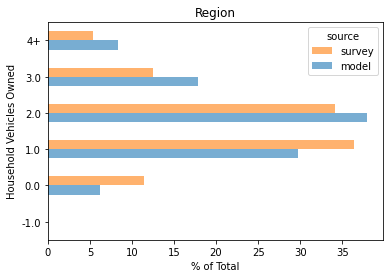

In [5]:
df['model'] = (df['model']/df['model'].sum()) * 100  
df['survey'] = (df['survey']/df['survey'].sum()) * 100  
df = df[['model', 'survey']]
ax = df.plot(kind='barh', title='Region', legend='reverse', alpha=0.6)
ax.set_xlabel("% of Total")
ax.set_ylabel('Household Vehicles Owned')

## By Income

In [6]:
df = load_data('auto_ownership')

# Define income groups
inc_bin=[-1,20000,40000,75000,9999999999999]
inc_bin_labels = ['0-$20k','$20-40k','$40-75k','>$75k']
df['income_bin'] = pd.cut(df['hhincome_thousands'], bins=inc_bin, labels=inc_bin_labels)

df.loc[df['hhvehs'] >= 3, 'hhvehs'] = '3+'
df.rename(columns={'hhvehs': 'Household Vehicles Owned'}, inplace=True)
pd.pivot_table(df, index=['Household Vehicles Owned','source'], columns='income_bin', values='hhexpfac', aggfunc='sum')

income_bin                       0-$20k  $20-40k  $40-75k     >$75k
Household Vehicles Owned source                                    
-1.0                     model        0        0        0         0
                         survey       0        0        0       626
0.0                      model   46,382   20,561   16,629    24,425
                         survey 241,446  129,906   37,383   171,047
1.0                      model   91,984   85,282  117,113   221,446
                         survey 429,115  371,718  347,661   692,674
2.0                      model   24,542   41,559   98,236   493,588
                         survey 228,397  143,841  214,538 1,138,653
3+                       model    8,467   14,485   48,136   382,970
                         survey 119,556   20,420   67,502   696,790

In [7]:
pd.options.display.float_format = "{:,.2%}".format
_df_model = pd.pivot_table(df[df['source'] == 'model'], index='Household Vehicles Owned', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_model = _df_model/_df_model.sum()  * 100
_df_survey = pd.pivot_table(df[df['source'] == 'survey'], index='Household Vehicles Owned', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_survey = _df_survey/_df_survey.sum()  * 100

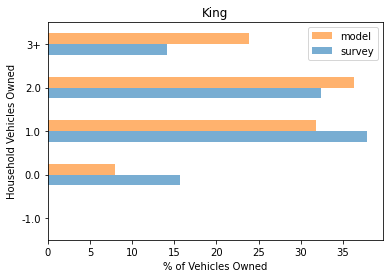

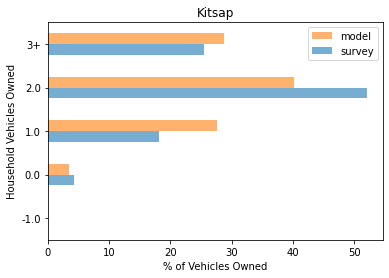

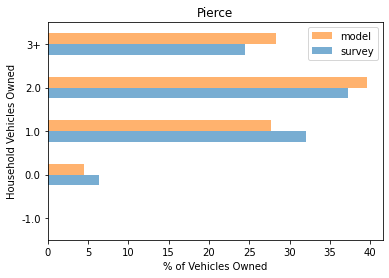

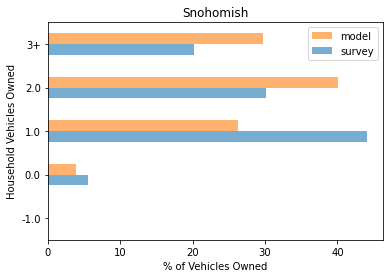

In [8]:
for county in df['hh_county'].unique():
    _df = pd.DataFrame([_df_survey[county],_df_model[county]]).T
    _df.columns = ['survey','model']
    ax = _df.plot(kind='barh', title=county, legend='reverse', alpha=0.6)
    ax.set_xlabel('% of Vehicles Owned')

,hhvehs,hh_county,hhincome_thousands,hhexpfac,source
0,0.00%,King,"-1,000,000.00%",200.00%,model
1,0.00%,King,0.00%,"913,300.00%",model
2,0.00%,King,"1,000,000.00%","1,560,400.00%",model
3,0.00%,King,"2,000,000.00%","893,000.00%",model
4,0.00%,King,"3,000,000.00%","700,600.00%",model
...,...,...,...,...,...
192,700.00%,King,"12,000,000.00%","106,228.00%",survey
193,700.00%,Pierce,"12,000,000.00%","156,376.00%",survey
194,800.00%,Snohomish,"12,000,000.00%","29,793.00%",survey
195,900.00%,Snohomish,0.00%,"38,526.00%",survey
